In [53]:
# Importando as bibliotecas necessárias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [54]:
# Importando a base de dados
df = pd.read_csv('Mall_Customers.csv')
df.info()
df.describe()
# A base não tem erros ou valores faltantes
# O gênero será posteriormente tratado com OneHotenconding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


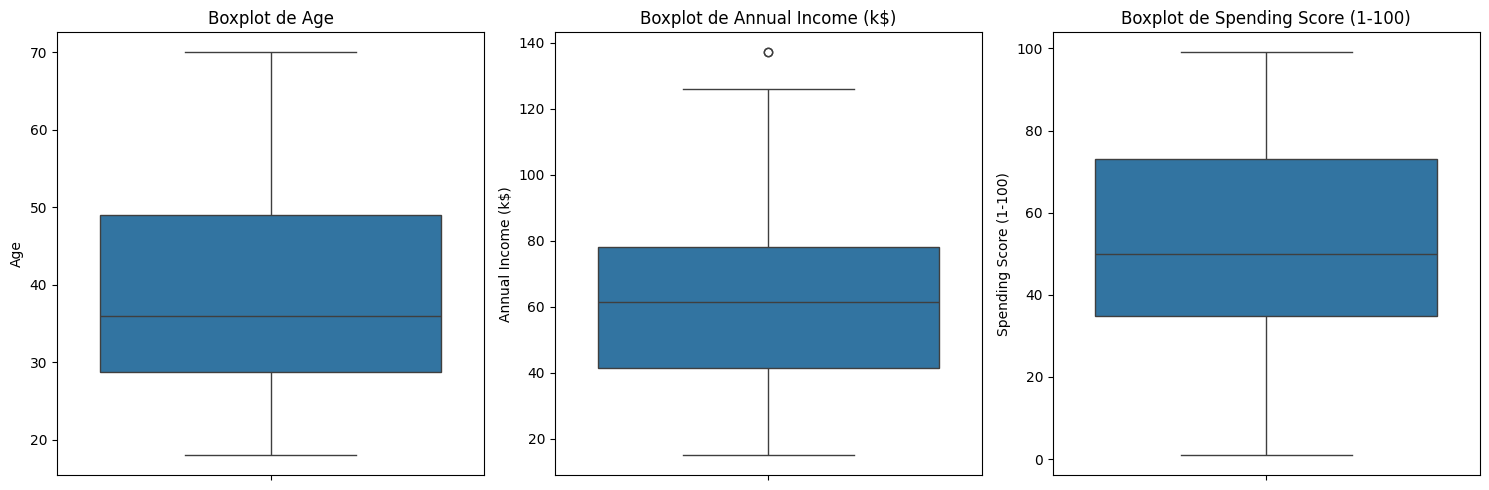

In [55]:
# Boxplots para verificação de Outliers
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15, 5)) 
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1) 
    sns.boxplot(y=df[col]) 
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()
# Apenas um Outlier detectado, por enquanto ele será mantido.

In [56]:
# Pré-processo de dados
# --- 1. removendo coluna 'CustomerID' ---
df = df.drop('CustomerID', axis=1)

# --- 2. tranformando as colunas numéricas ---
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# --- 3. transformando a coluna gênero ---
df = pd.get_dummies(df, columns=['Gender'], drop_first=False)
df.head(10)
# Eu esperava que o getdummies forncesse valores de 0 e 1 para as colunas, entretanto True e False apareceram

# --- 4. transformando True e False das colunas gender ---
df['Gender_Female'] = df['Gender_Female'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0
5,-1.209269,-1.662660,1.001596,1,0
6,-0.276302,-1.624491,-1.715913,1,0
7,-1.137502,-1.624491,1.700384,1,0
8,1.804932,-1.586321,-1.832378,0,1
9,-0.635135,-1.586321,0.846310,1,0


In [91]:
# Aplicando k-means
kmeans_mall = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_mall.fit(df)
# Eu rodei o número de clusters com algumas possibilidades para testar. Entretanto, acredito que n=4 seja o que faça o maior sentido.
# Conseguimos dividir os clientes em 4 grandes grupos: 
# inferior esquerdo (amarelo - 3) - ganham pouco e gastam pouco no shopping
# superior esquerdo (azul - 1) - ganham pouco e gastam muito no shopping
# inferior direito (roxo - 0) - ganham muito e gastam pouco no shopping
# superior direito (verde - 2) - ganham muito e gastam muito no shopping

KMeans(n_clusters=4, n_init=10, random_state=42)

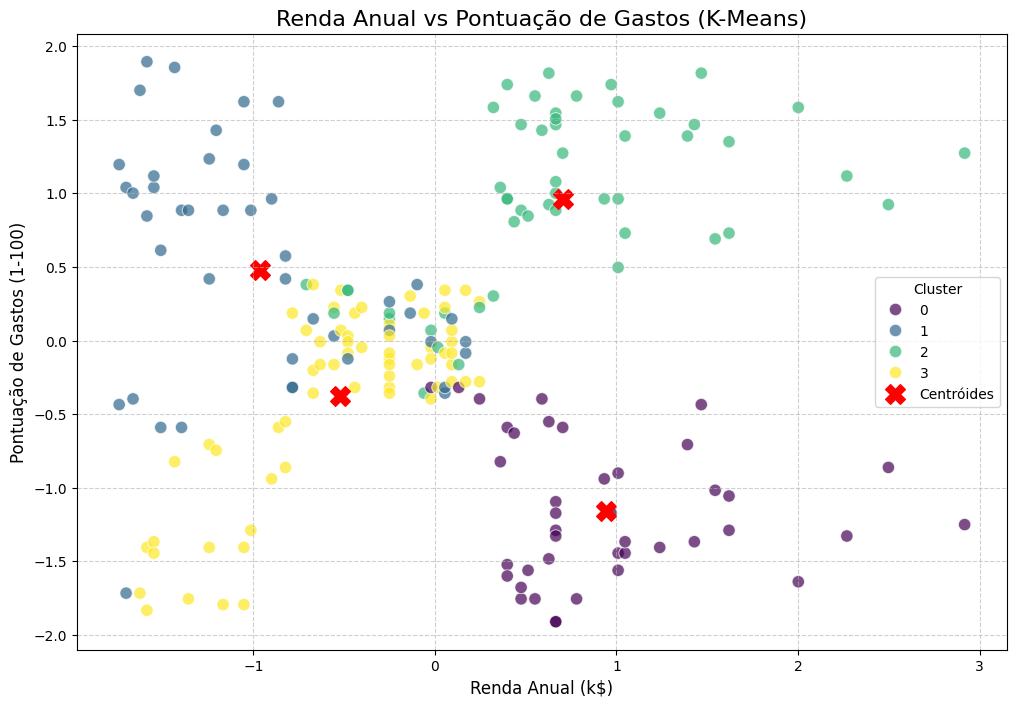

In [90]:
# Gerando gráfico para visualizar os grupos
df['cluster_labels'] = kmeans_mall.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='cluster_labels',
                palette='viridis', s=80, alpha=0.7)
centroids = kmeans_mall.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2],
            marker='X', color='red', s=200, label='Centróides')
plt.title('Renda Anual vs Pontuação de Gastos (K-Means)', fontsize=16)
plt.xlabel('Renda Anual (k$)', fontsize=12)
plt.ylabel('Pontuação de Gastos (1-100)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()

In [102]:
# Análise de seox em cada uma das segmentações de clientes
df_original['cluster_labels'] = kmeans_mall.labels_
gender_por_grupo = df_original.groupby('cluster_labels')['Gender'].value_counts(normalize=True).unstack(fill_value=0)
print("Análise do Perfil de Gênero por Cluster:")
print(gender_por_grupo)

Análise do Perfil de Gênero por Cluster:
Gender            Female      Male
cluster_labels                    
0               0.584615  0.415385
1               0.550000  0.450000
2               0.596491  0.403509
3               0.473684  0.526316


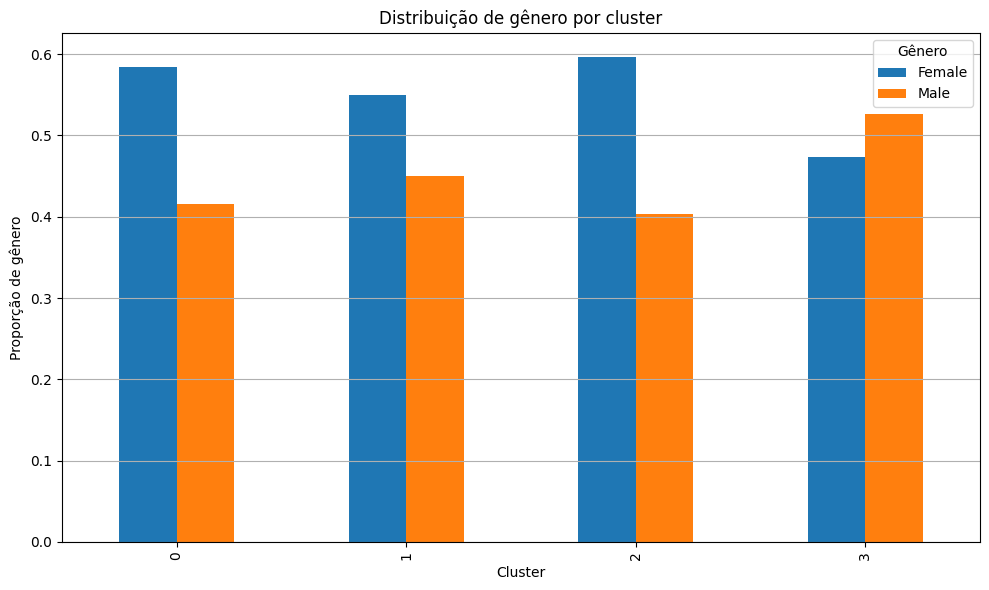

In [105]:
# Visualização gráfica
gender_distribution_by_cluster.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de gênero por cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção de gênero')
plt.legend(title='Gênero')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# inferior esquerdo (amarelo - 3) - ganham pouco e gastam pouco no shopping
# superior esquerdo (azul - 1) - ganham pouco e gastam muito no shopping
# inferior direito (roxo - 0) - ganham muito e gastam pouco no shopping
# superior direito (verde - 2) - ganham muito e gastam muito no shopping

# De maneira geral, o comportamento do público desse shopping é similar ao da vida real, o público feminino tende a gastar mais que o masculino em shoppings
# seja devido ao nicho da maioria das lojas ou do ambiente em si.
# O único grupo em que o homem é maioria é no grupo que ganha menos e gasta menos.
# É esperado que o time de marketing faça propagandas específicas para as mulheres, aproveitando datas comemorativas e o dia 08 de março, por exemplo.
# Se fossemos também abordar uma estratégia para o público masculino (estratégia não prioritária), forcar em itens de menor valor agregado ou em datas e 
# ocasiões em que o núcleo familiar seja evidenciado (dia dos namorados/dia dos pais, por exemplo).